In [3]:
# 导入函数库和数据
import numpy as np
from scipy.integrate import odeint # 微分方程函数
from scipy.optimize import minimize # 优化函数
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
sns.set_style("darkgrid") # 设置图表风格
sns.set_context("paper")
plt.rcParams["font.sans-serif"]=["SimHei"] # 解决中文标题，坐标轴名，刻度名等问题
plt.rcParams["axes.unicode_minus"]=False  
import openpyxl # 用于打开excel表格
import palettable # 用于打开excel子表

df1 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","朝阳区")
df2 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","南关区")
df3 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","宽城区")
df4 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","绿园区")
df5 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","二道区")
df6 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","长春新区（高新）")
df7 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","经开区")
df8 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","净月区")
df9 = pd.read_excel("data/3.29到4.9九个区蔬菜供应和采购数据.xlsx","汽开区")

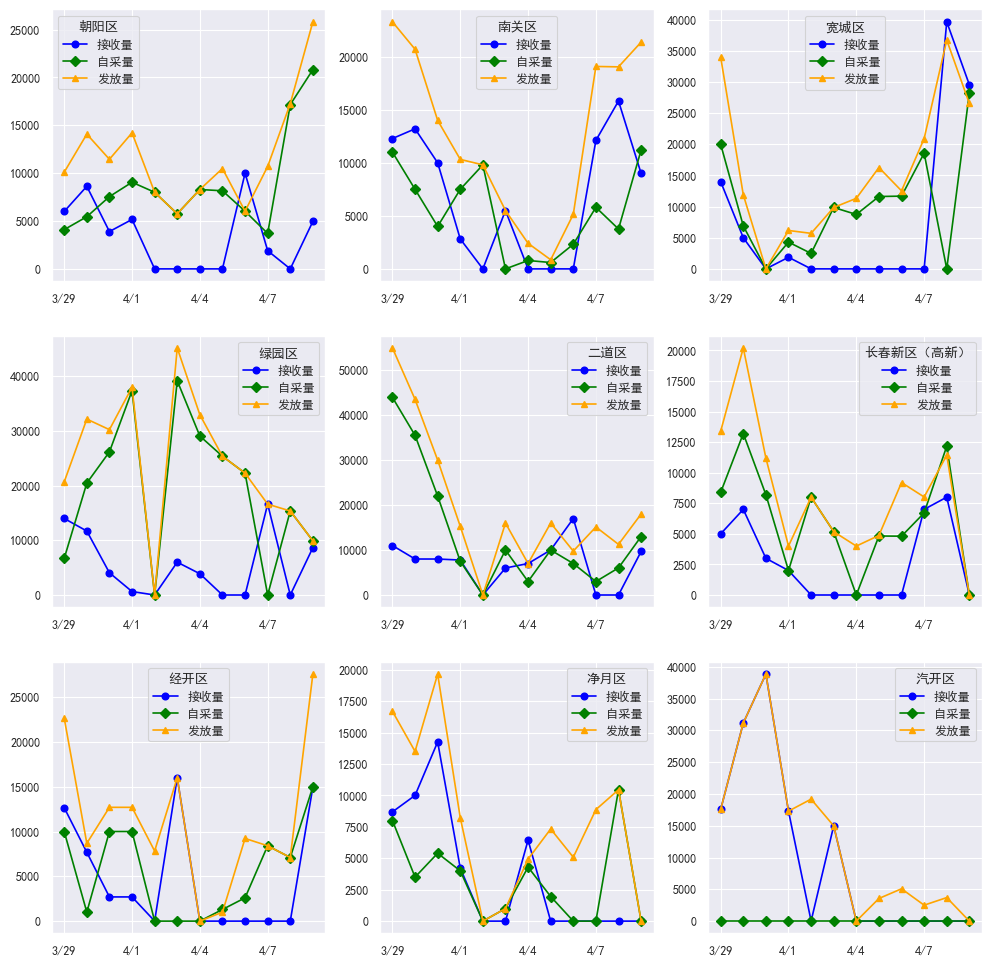

In [4]:
# 问题3
# 九个区蔬菜包需求发放图表

fig = plt.figure(figsize=[12,12]) # 画布设置
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

X = np.array(range(1,13)) # 变量设置
X_label = ["3/29","4/1","4/4","4/7"]
Y11 = df1["接收菜包数量"]; Y12 = df1["自采蔬菜包数量"]; Y13 = df1["蔬菜包投放总量"]
Y21 = df2["接收菜包数量"]; Y22 = df2["自采蔬菜包数量"]; Y23 = df2["蔬菜包投放总量"]
Y31 = df3["接收菜包数量"]; Y32 = df3["自采蔬菜包数量"]; Y33 = df3["蔬菜包投放总量"]
Y41 = df4["接收菜包数量"]; Y42 = df4["自采蔬菜包数量"]; Y43 = df4["蔬菜包投放总量"]
Y51 = df5["接收菜包数量"]; Y52 = df5["自采蔬菜包数量"]; Y53 = df5["蔬菜包投放总量"]
Y61 = df6["接收菜包数量"]; Y62 = df6["自采蔬菜包数量"]; Y63 = df6["蔬菜包投放总量"]
Y71 = df7["接收菜包数量"]; Y72 = df7["自采蔬菜包数量"]; Y73 = df7["蔬菜包投放总量"]
Y81 = df8["接收菜包数量"]; Y82 = df8["自采蔬菜包数量"]; Y83 = df8["蔬菜包投放总量"]
Y91 = df9["接收菜包数量"]; Y92 = df9["自采蔬菜包数量"]; Y93 = df9["蔬菜包投放总量"]

ax1.plot(X, Y11, color="blue",marker="o", label="接收量")
ax1.plot(X, Y12, color="green",marker="D", label="自采量")
ax1.plot(X, Y13, color="orange",marker="^", label="发放量")
ax1.set_xticks([1,4,7,10], labels = X_label)
ax1.legend(title = "朝阳区")

ax2.plot(X, Y21, color="blue",marker="o", label="接收量")
ax2.plot(X, Y22, color="green",marker="D", label="自采量")
ax2.plot(X, Y23, color="orange",marker="^", label="发放量")
ax2.set_xticks([1,4,7,10], labels = X_label)
ax2.legend(title = "南关区")

ax3.plot(X, Y31, color="blue",marker="o", label="接收量")
ax3.plot(X, Y32, color="green",marker="D", label="自采量")
ax3.plot(X, Y33, color="orange",marker="^", label="发放量")
ax3.set_xticks([1,4,7,10], labels = X_label)
ax3.legend(title = "宽城区")

ax4.plot(X, Y41, color="blue",marker="o", label="接收量")
ax4.plot(X, Y42, color="green",marker="D", label="自采量")
ax4.plot(X, Y43, color="orange",marker="^", label="发放量")
ax4.set_xticks([1,4,7,10], labels = X_label)
ax4.legend(title = "绿园区")

ax5.plot(X, Y51, color="blue",marker="o", label="接收量")
ax5.plot(X, Y52, color="green",marker="D", label="自采量")
ax5.plot(X, Y53, color="orange",marker="^", label="发放量")
ax5.set_xticks([1,4,7,10], labels = X_label)
ax5.legend(title = "二道区")

ax6.plot(X, Y61, color="blue",marker="o", label="接收量")
ax6.plot(X, Y62, color="green",marker="D", label="自采量")
ax6.plot(X, Y63, color="orange",marker="^", label="发放量")
ax6.set_xticks([1,4,7,10], labels = X_label)
ax6.legend(title = "长春新区（高新）")

ax7.plot(X, Y71, color="blue",marker="o", label="接收量")
ax7.plot(X, Y72, color="green",marker="D", label="自采量")
ax7.plot(X, Y73, color="orange",marker="^", label="发放量")
ax7.set_xticks([1,4,7,10], labels = X_label)
ax7.legend(title = "经开区")

ax8.plot(X, Y81, color="blue",marker="o", label="接收量")
ax8.plot(X, Y82, color="green",marker="D", label="自采量")
ax8.plot(X, Y83, color="orange",marker="^", label="发放量")
ax8.set_xticks([1,4,7,10], labels = X_label)
ax8.legend(title = "净月区")

ax9.plot(X, Y91, color="blue",marker="o", label="接收量")
ax9.plot(X, Y92, color="green",marker="D", label="自采量")
ax9.plot(X, Y93, color="orange",marker="^", label="发放量")
ax9.set_xticks([1,4,7,10], labels = X_label)
ax9.legend(title = "汽开区")

plt.savefig("figure/九个区蔬菜需求与发放情况.png")
plt.show()

In [3]:
# 问题3
# 向量自回归（VAR）时间序列预测模型

# 导入函数包（df数据已导入）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# 数据的平稳性检验
# 朝阳区
df1[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df1[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df1["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df1["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df1["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-2.9842393808004055   10%: -2.7723823456790124
自采蔬菜包数量:-2.8689414660327905   10%: -2.7723823456790124
蔬菜包投放总量:-2.7043684690536453  10%: -2.7487
"""
#南关区
df2[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df2[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df2["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df2["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df2["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-2.4923390923966626  10%: -2.7487
自采蔬菜包数量:-3.131099182374721  10%: -2.7487
蔬菜包投放总量:-1.8915758805784542  10%: -2.7487
"""
# 宽城区
df3[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df3[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df3["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df3["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df3["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-3.683106327169558  10%: -2.7487
自采蔬菜包数量:-4.944462889732955  10%: -2.7487
蔬菜包投放总量:-3.4975471635020265  10%: -2.8438679591836733
"""
# 绿园区
df4[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df4[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df4["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df4["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df4["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-1.7386419848852217  10%: -2.8438679591836733
自采蔬菜包数量:-5.744277125132422  10%: -2.7487
蔬菜包投放总量:-3.4322675094447685  10%: -2.7723823456790124
"""
# 二道区
df5[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df5[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df5["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df5["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df5["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-4.449908918261584  10%: -2.8438679591836733
自采蔬菜包数量:-2.115423851287399  10%: -2.7487}
蔬菜包投放总量:-1.6380168833136721  10%: -2.80296062
"""
# 长春新区（高新）
df6 = df6.drop(11,axis=0)
df6[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df6[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df6["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df6["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df6["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-1.9561436374391228  10%: -2.901197777777778
自采蔬菜包数量:-2.061692743498241  10%: -2.8438679591836733
蔬菜包投放总量:-3.700326569687076  10%: -2.7487
"""
# 经开区
df7[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df7[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df7["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df7["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df7["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-3.9013216314587256  10%: -2.7487
自采蔬菜包数量:-2.0910091520680494  10%: -2.7723823456790124
蔬菜包投放总量:-3.601707581539447  10%: -2.7487
"""
# 净月区
df8 = df8.drop(11,axis=0)
df8[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df8[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df8["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df8["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df8["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-3.024836190610262  10%: -2.901197777777778
自采蔬菜包数量:-1.354302706564498  10%: -2.8438679591836733
蔬菜包投放总量:-2.6974269965193782  10%: -2.7487
"""
# 汽开区
df9 = df9.drop(11,axis=0)
df9[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]] = df9[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].diff(periods=1) # 数据差分
print(adfuller(df9["接收菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df9["自采蔬菜包数量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
print(adfuller(df9["蔬菜包投放总量"].dropna(), maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False))
"""
接收菜包数量:-3.085880161098703  10%: -2.8438679591836733
自采蔬菜包数量:nan
蔬菜包投放总量:-4.191690768857164  10%: -2.8438679591836733
"""

(-2.9842393808004055, 0.03639268848975475, 1, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 142.45924763393504)
(-2.8689414660327905, 0.04908072509426905, 1, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 141.63339586025893)
(-2.1043684690536453, 0.2427616503305109, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 139.25251805375046)
(-2.4923390923966626, 0.11734945083341958, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 145.51552380094896)
(-3.131099182374721, 0.024335687414041803, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 142.1690956166597)
(-1.8915758805784542, 0.3360344010509516, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 144.53972434803143)
(-3.683106327169558, 0.004357152274325108, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 157.26074095510418)
(-4.944462889732955, 2.8551840491131894e-05, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.74

c:\Python310\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


'\n接收菜包数量:-3.085880161098703  10%: -2.8438679591836733\n自采蔬菜包数量:nan\n蔬菜包投放总量:-4.191690768857164  10%: -2.8438679591836733\n'

In [ ]:
# VAR模型构建与预测

# 朝阳区
model = VAR(df1[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df1[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 4960  自采蔬菜包数量: 20811 蔬菜包投放总量:25808
"""
tail = [4960, 20811, 25808]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/朝阳区预测值.csv")

# 南关区
model = VAR(df2[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df2[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 9000 自采蔬菜包数量: 11200 蔬菜包投放总量:21371
"""
tail = [9000, 11200, 21371]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/南关区预测值.csv")

# 宽城区
model = VAR(df3[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df3[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 29572 自采蔬菜包数量: 28230 蔬菜包投放总量:26557
"""
tail = [29572, 28230, 26557]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/宽城区预测值.csv")

# 绿园区
model = VAR(df4[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 1}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df4[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 8656 自采蔬菜包数量: 9900 蔬菜包投放总量:9900
"""
tail = [8656, 9900, 9900]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/绿园区预测值.csv")

# 二道区
model = VAR(df5[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 0}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df5[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 9673 自采蔬菜包数量: 13000 蔬菜包投放总量:18000
"""
tail = [9673, 13000, 18000]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/二道区预测值.csv")

# 长春新区（高新）
model = VAR(df6[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/8',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 0}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df6[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 7)).T
print(df6)
"""
4月8日 接收菜包数量: 8000 自采蔬菜包数量: 12168 蔬菜包投放总量:11431
"""
tail = [8000, 12168, 11431]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/长春新区（高新）预测值.csv")

# 经开区
model = VAR(df7[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/9',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 0}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df7[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 6)).T
"""
4月9日 接收菜包数量: 14974 自采蔬菜包数量: 15000 蔬菜包投放总量:27574
"""
tail = [9673, 13000, 18000]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/经开区预测值.csv")

# 净月区
model = VAR(df8[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/8',freq='M'))
lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 0}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df8[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 7)).T
"""
4月8日 接收菜包数量: 0 自采蔬菜包数量: 10451 蔬菜包投放总量:10451
"""
tail = [8000, 12168, 11431]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/净月区预测值.csv")

# 汽开区
model = VAR(df9[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].dropna(), dates=pd.date_range('2022/3/30','2022/4/8',freq='M'))
# lag_order = model.select_order()
print(lag_order.selected_orders)
"""
{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 0}
"""
model = model.fit(1)
result_diff = np.array(model.forecast(y = df9[["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]].values, steps = 7)).T
"""
4月8日 接收菜包数量: 0 自采蔬菜包数量: 0 蔬菜包投放总量:3700
"""
tail = [0, 0, 3700]
result = []
for i in range(len(result_diff)):
    result.append([])
    for j in range(len(result_diff[0])):
        if j==0:
            result[i].append(result_diff[i][j]+tail[i])
        else:
            result[i].append(result_diff[i][j]+result[i][j-1])
df = pd.DataFrame(np.array(result).T, columns = ["接收菜包数量","自采蔬菜包数量","蔬菜包投放总量"]).to_csv("data/汽开区预测值.csv")

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(df5["蔬菜包投放总量"], order=(1,0,1)).fit()
# print(model.forecast(6))

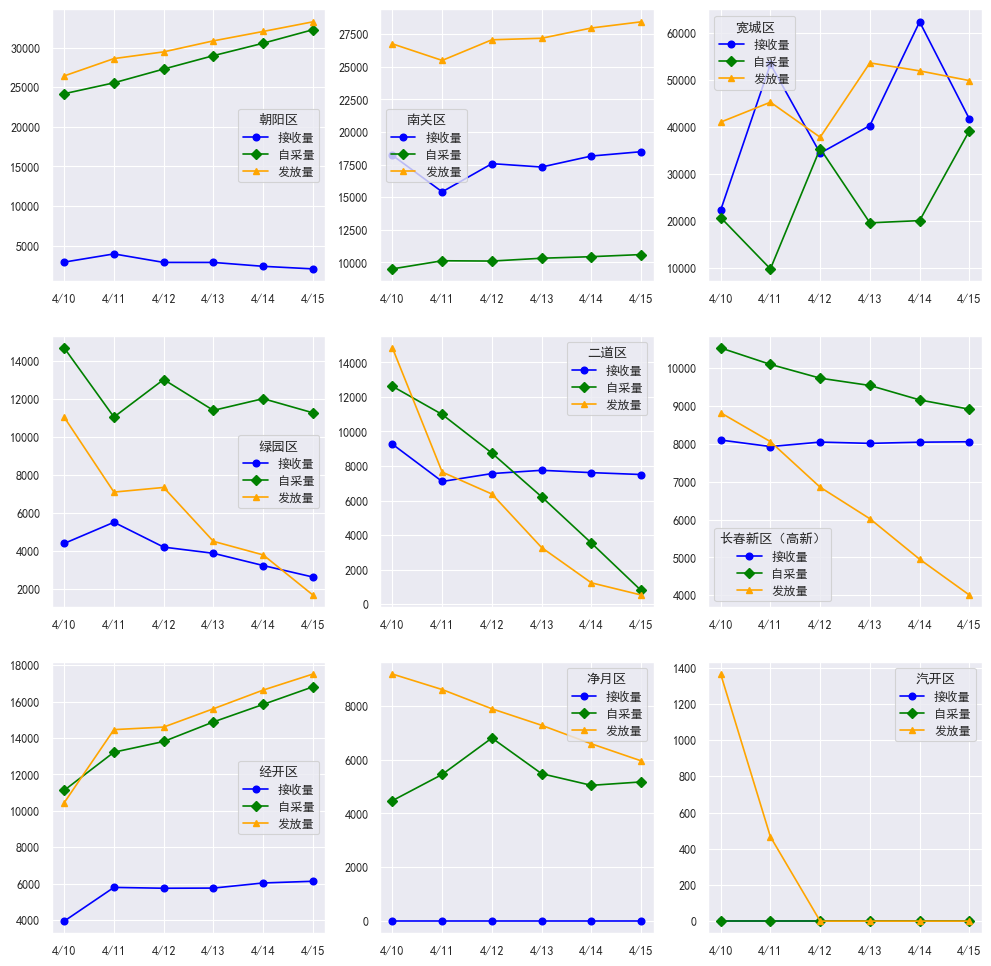

In [11]:
# 问题3
# 4月10日至15日各区蔬菜供应预测图表

df1 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","朝阳区")
df2 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","南关区")
df3 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","宽城区")
df4 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","绿园区")
df5 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","二道区")
df6 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","长春新区（高新）")
df7 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","经开区")
df8 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","净月区")
df9 = pd.read_excel("data/4.10至4.15九个区蔬菜供应预测.xlsx","汽开区")

fig = plt.figure(figsize=[12,12]) # 画布设置
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

X = np.array(range(1,7)) # 变量设置
X_label = ["4/10","4/11","4/12","4/13","4/14","4/15"]
Y11 = df1["接收菜包数量"]; Y12 = df1["自采蔬菜包数量"]; Y13 = df1["蔬菜包投放总量"]
Y21 = df2["接收菜包数量"]; Y22 = df2["自采蔬菜包数量"]; Y23 = df2["蔬菜包投放总量"]
Y31 = df3["接收菜包数量"]; Y32 = df3["自采蔬菜包数量"]; Y33 = df3["蔬菜包投放总量"]
Y41 = df4["接收菜包数量"]; Y42 = df4["自采蔬菜包数量"]; Y43 = df4["蔬菜包投放总量"]
Y51 = df5["接收菜包数量"]; Y52 = df5["自采蔬菜包数量"]; Y53 = df5["蔬菜包投放总量"]
Y61 = df6["接收菜包数量"]; Y62 = df6["自采蔬菜包数量"]; Y63 = df6["蔬菜包投放总量"]
Y71 = df7["接收菜包数量"]; Y72 = df7["自采蔬菜包数量"]; Y73 = df7["蔬菜包投放总量"]
Y81 = df8["接收菜包数量"]; Y82 = df8["自采蔬菜包数量"]; Y83 = df8["蔬菜包投放总量"]
Y91 = df9["接收菜包数量"]; Y92 = df9["自采蔬菜包数量"]; Y93 = df9["蔬菜包投放总量"]

ax1.plot(X, Y11, color="blue",marker="o", label="接收量")
ax1.plot(X, Y12, color="green",marker="D", label="自采量")
ax1.plot(X, Y13, color="orange",marker="^", label="发放量")
ax1.set_xticks(X, labels = X_label)
ax1.legend(title = "朝阳区")

ax2.plot(X, Y21, color="blue",marker="o", label="接收量")
ax2.plot(X, Y22, color="green",marker="D", label="自采量")
ax2.plot(X, Y23, color="orange",marker="^", label="发放量")
ax2.set_xticks(X, labels = X_label)
ax2.legend(title = "南关区")

ax3.plot(X, Y31, color="blue",marker="o", label="接收量")
ax3.plot(X, Y32, color="green",marker="D", label="自采量")
ax3.plot(X, Y33, color="orange",marker="^", label="发放量")
ax3.set_xticks(X, labels = X_label)
ax3.legend(title = "宽城区")

ax4.plot(X, Y41, color="blue",marker="o", label="接收量")
ax4.plot(X, Y42, color="green",marker="D", label="自采量")
ax4.plot(X, Y43, color="orange",marker="^", label="发放量")
ax4.set_xticks(X, labels = X_label)
ax4.legend(title = "绿园区")

ax5.plot(X, Y51, color="blue",marker="o", label="接收量")
ax5.plot(X, Y52, color="green",marker="D", label="自采量")
ax5.plot(X, Y53, color="orange",marker="^", label="发放量")
ax5.set_xticks(X, labels = X_label)
ax5.legend(title = "二道区")

ax6.plot(X, Y61, color="blue",marker="o", label="接收量")
ax6.plot(X, Y62, color="green",marker="D", label="自采量")
ax6.plot(X, Y63, color="orange",marker="^", label="发放量")
ax6.set_xticks(X, labels = X_label)
ax6.legend(title = "长春新区（高新）")

ax7.plot(X, Y71, color="blue",marker="o", label="接收量")
ax7.plot(X, Y72, color="green",marker="D", label="自采量")
ax7.plot(X, Y73, color="orange",marker="^", label="发放量")
ax7.set_xticks(X, labels = X_label)
ax7.legend(title = "经开区")

ax8.plot(X, Y81, color="blue",marker="o", label="接收量")
ax8.plot(X, Y82, color="green",marker="D", label="自采量")
ax8.plot(X, Y83, color="orange",marker="^", label="发放量")
ax8.set_xticks(X, labels = X_label)
ax8.legend(title = "净月区")

ax9.plot(X, Y91, color="blue",marker="o", label="接收量")
ax9.plot(X, Y92, color="green",marker="D", label="自采量")
ax9.plot(X, Y93, color="orange",marker="^", label="发放量")
ax9.set_xticks(X, labels = X_label)
ax9.legend(title = "汽开区")

plt.savefig("figure/九个区蔬菜需求与发放情况.png")
plt.show()